<a href="https://www.kaggle.com/code/mehdip1/diabetes-proj?scriptVersionId=264389320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Dataset Documentation

**Dataset Name:** diabetes

## Description
This dataset contains medical information for individuals, primarily focused on factors related to diabetes.  
It is commonly used for predicting the likelihood of diabetes based on various health indicators.

## Attributes

| Attribute | Description |
|-----------|-------------|
| Pregnancies | Number of pregnancies the individual has had |
| Glucose | Glucose level in blood |
| BloodPressure | Blood pressure measurement |
| SkinThickness | Thickness of the skin (in mm) |
| Insulin | Insulin level in blood |
| BMI | Body Mass Index (weight in kg / height in m²) |
| DiabetesPedigreeFunction | A function that scores likelihood of diabetes based on family history |
| Age | Age of the individual |
| Outcome | Diabetes result: `1` = Yes (diabetic), `0` = No (non-diabetic) |

## Notes
- This dataset is widely used for classification tasks in machine learning.
- Some columns may contain zero or missing values that require preprocessing before analysis.


## Import
This section includes importing the dataset and all necessary libraries required for the project.
These libraries help with data manipulation, analysis, and visualization.

In [1]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as wr 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


wr.filterwarnings('ignore')

In [2]:
file_path = '/kaggle/input/diabetes-dataset/diabetes.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)

This section explores and analyzes the dataset to gain insights.  
EDA helps understand patterns, distributions, correlations, and potential issues like missing values.

In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.describe(include="int64")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000,1.000000


In [10]:
df.describe(include="float64")

,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,31.992578,0.471876
std,7.884160,0.331329
min,0.000000,0.078000
25%,27.300000,0.243750
50%,32.000000,0.372500
75%,36.600000,0.626250
max,67.100000,2.420000


## Duplicate Values

This section checks for duplicate rows in the dataset and removes them if necessary.  
Handling duplicates ensures data quality and prevents bias in analysis or modeling.

In [11]:
duplicated_val = df.duplicated().sum()
print(duplicated_val)

0


## Missing Values

This section identifies and handles missing values in the dataset.  
Handling missing values is important to maintain data quality and ensure accurate analysis and modeling.


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
(df.isnull().sum()/len(df)) * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## Data Visualization

This section visualizes the dataset to understand feature distributions, relationships, and patterns.  
The following visualization functions have been used:
- `sns.histplot` – for feature distributions
- `sns.heatmap` – for correlation analysis
- `sns.pairplot` – for pairwise relationships
- `sns.scatterplot` – for scatter plots between features
- `sns.regplot` – for regression plots

In [14]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


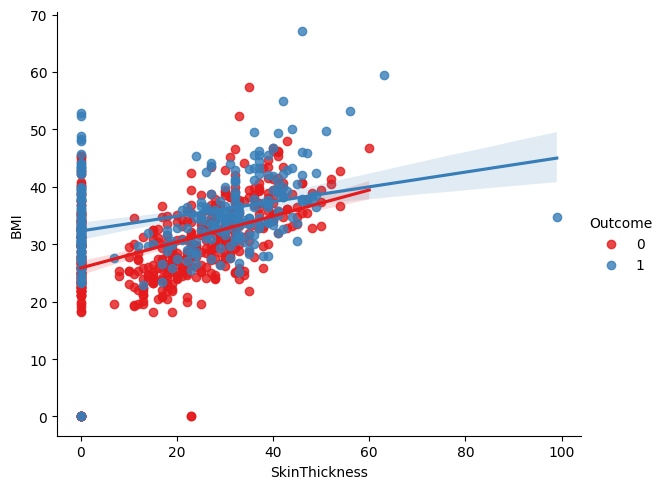

In [15]:
sns.lmplot(
    data=df,                  
    x="SkinThickness",       
    y="BMI",                  
    hue="Outcome",            
    palette="Set1",          
    height=5,               
    aspect=1.2              
)
plt.show()

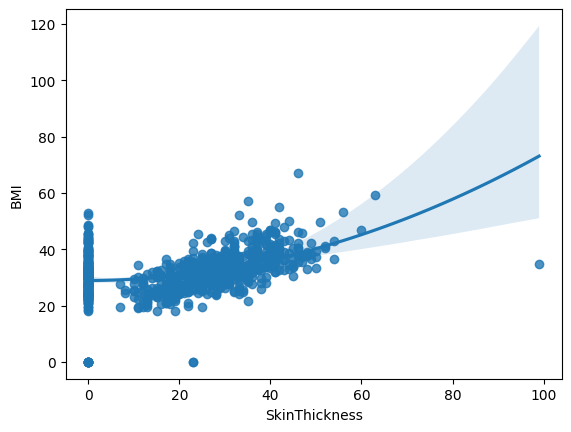

In [16]:
sns.regplot(data=df,     
    x="SkinThickness",       
    y="BMI",                  
    order=2)
plt.show()

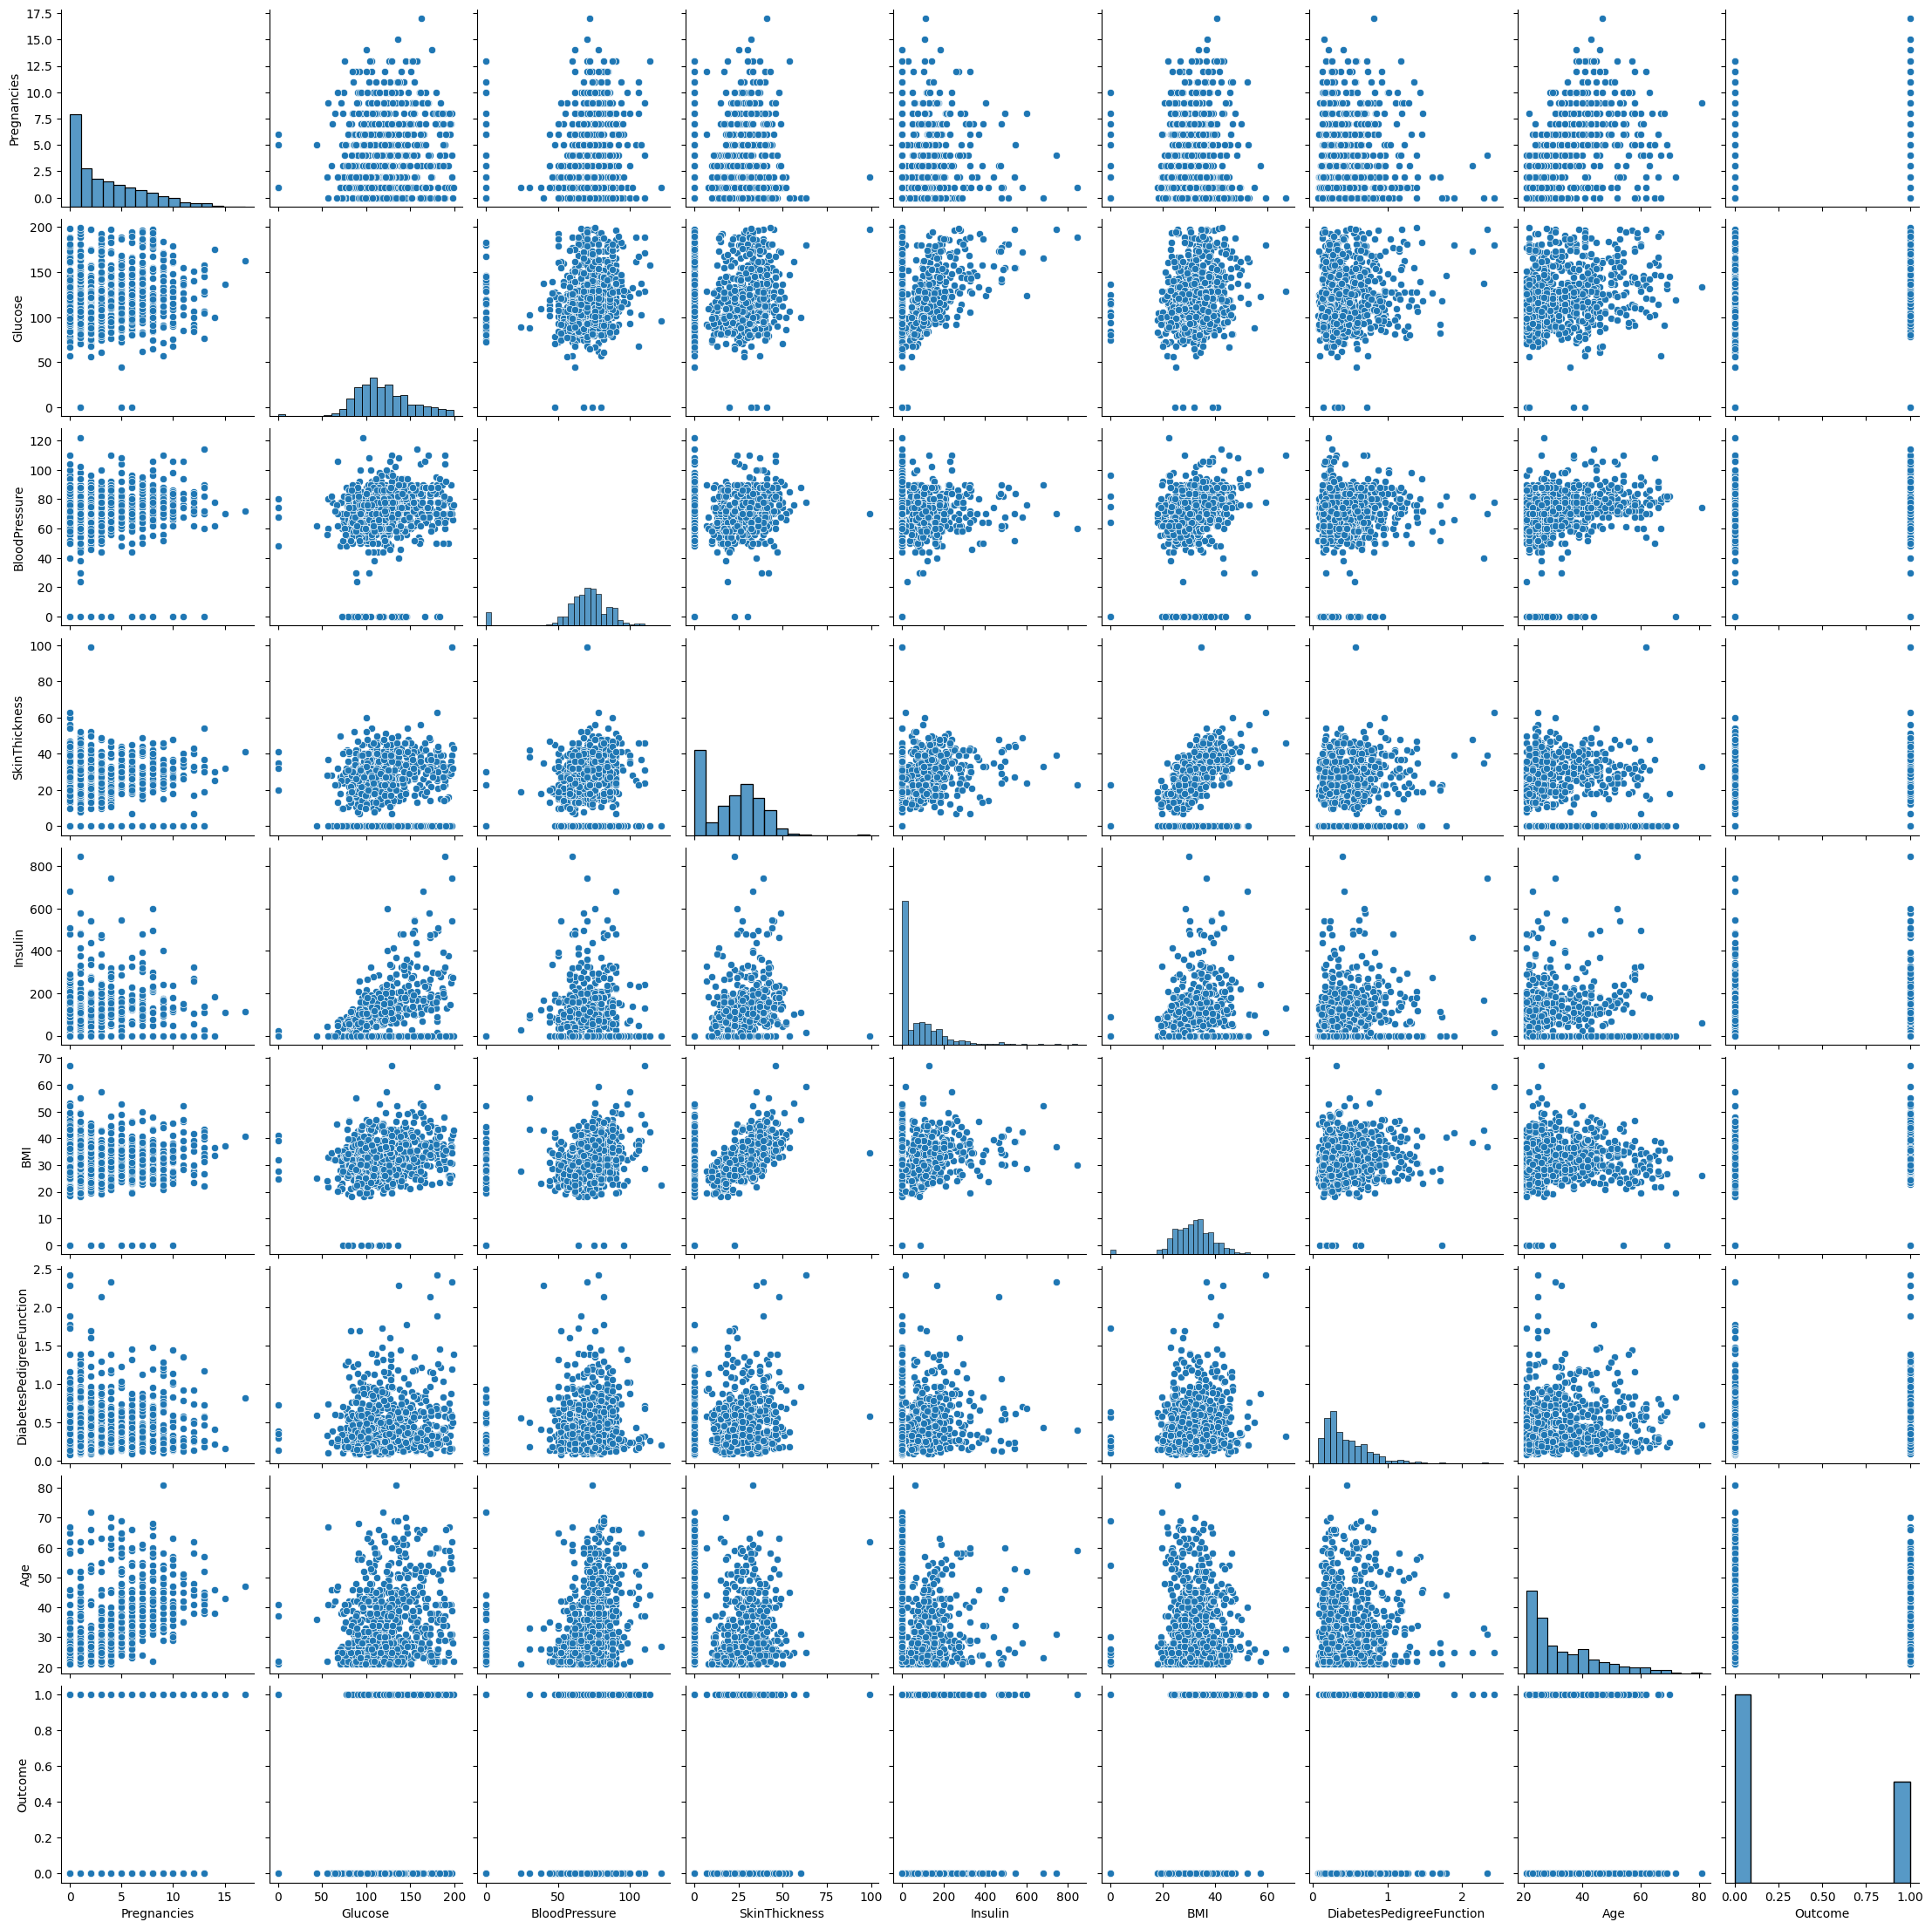

In [17]:
sns.pairplot(df, diag_kind="hist")
plt.show()

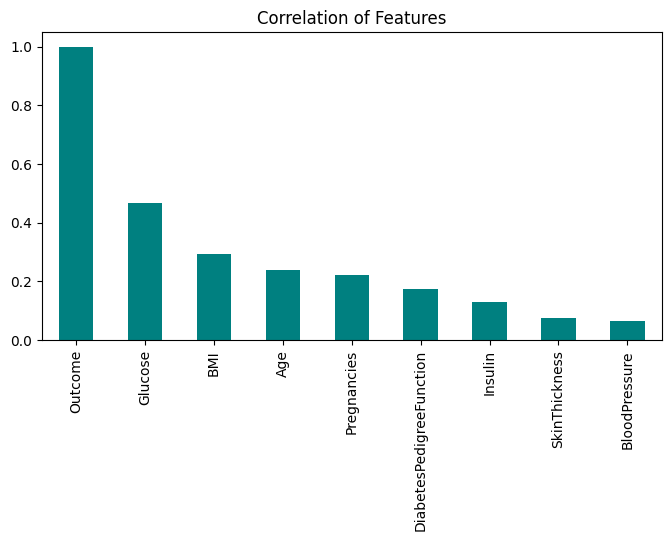

In [18]:
plt.figure(figsize=(8,4))
df.corr()["Outcome"].sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Correlation of Features")
plt.show()

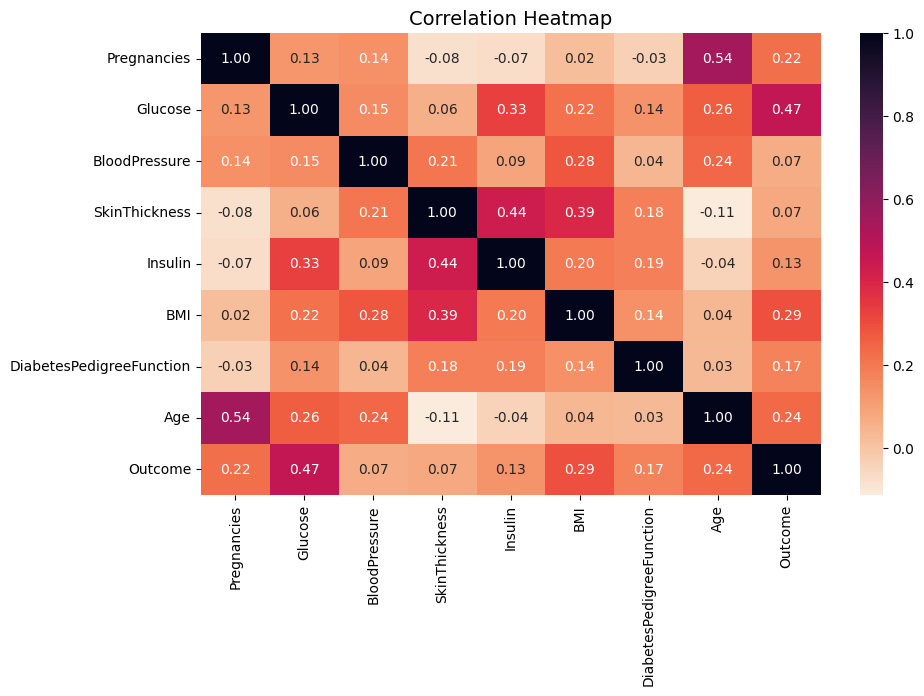

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="rocket_r", fmt=".2f")  
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

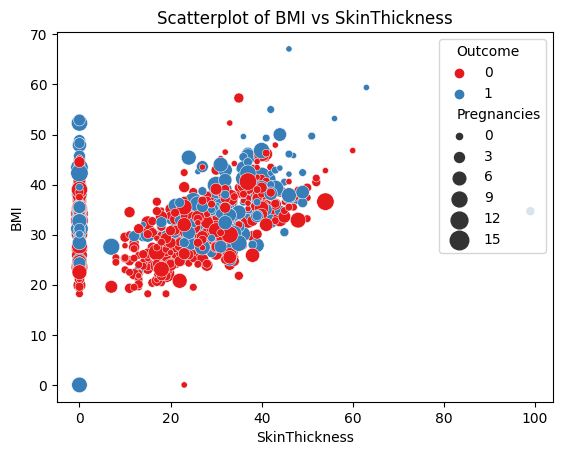

In [20]:
sns.scatterplot(
    data=df,                  
    x="SkinThickness",          
    y="BMI",                   
    hue="Outcome",               
    size="Pregnancies",         
    palette="Set1",            
    sizes=(20, 200)            
)

plt.title("Scatterplot of BMI vs SkinThickness")
plt.show()

# Preprocessing

This section prepares the data for modeling, including handling missing values, removing duplicates, scaling features, and defining the target column.  

**Dataset used:** `df` (the main DataFrame containing the diabetes dataset)  

## Target Column
The target column for this project is `Outcome`, which indicates whether a person has diabetes (`1` = Yes, `0` = No).  

**Features (`X`)**: All other columns except `Outcome`  
**Target (`y`)**: `Outcome` column

In [21]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [22]:
features = df.columns.drop("Outcome")
X = df[features]
y = df["Outcome"]

In [23]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Train Model

This section trains machine learning models on the preprocessed dataset.  
Different models can be used to predict the target column (`Outcome`) based on the features.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
361,5,158,70,0,0,29.8,0.207,63
309,2,124,68,28,205,32.9,0.875,30
433,2,139,75,0,0,25.6,0.167,29
211,0,147,85,54,0,42.8,0.375,24
185,7,194,68,28,0,35.9,0.745,41
...,...,...,...,...,...,...,...,...
220,0,177,60,29,478,34.6,1.072,21
116,5,124,74,0,0,34.0,0.220,38
227,3,162,52,38,0,37.2,0.652,24
492,4,99,68,38,0,32.8,0.145,33


In [27]:
y_train

361    0
309    1
433    0
211    0
185    1
      ..
220    1
116    1
227    1
492    0
418    0
Name: Outcome, Length: 614, dtype: int64

# Random Forest Model

We used the **Random Forest Classifier** to train on the data.  

**Model Performance:**  
- Accuracy: **78%**

In [28]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
[[92  8]
 [25 29]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



# Logistic Regression Model

Before training, all features were **scaled** to standardize the range and improve model performance.  

We used **Logistic Regression** to train on the preprocessed and scaled data.  

**Model Performance:**  
- Accuracy: **75%**

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[90 10]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.73      0.50      0.59        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



# Feature Importance - Random Forest

This section visualizes the importance of each feature in the **Random Forest** model.  
Features with higher importance have a greater impact on predicting the target (`Outcome`).


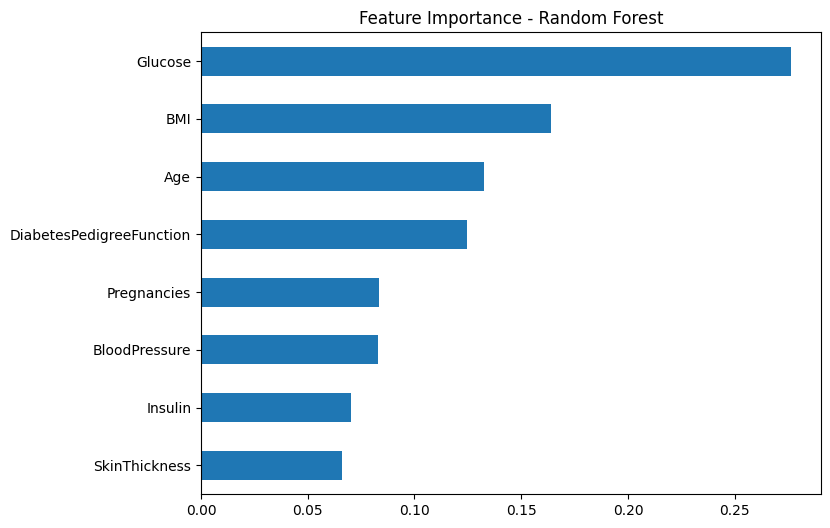

In [35]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.show()

# Conclusion

In this project, we analyzed the **Diabetes dataset** and built machine learning models to predict the `Outcome`.  

**Key Points:**
- Data preprocessing included handling missing values, removing duplicates, scaling features, and defining the target column.
- Exploratory Data Analysis (EDA) helped to understand feature distributions, correlations, and patterns.
- **Random Forest** achieved an accuracy of **78%**.
- **Logistic Regression** achieved an accuracy of **75%** on scaled features.
- Feature importance from Random Forest highlighted which variables most influence diabetes prediction.

Overall, the models provide a reasonable prediction of diabetes risk based on the available features.  
Further improvements can be made by hyperparameter tuning, feature engineering, or using additional datasets.
